In [746]:
# 필요한 모듈 임포트
import numpy as np # 선형대수 
import pandas as pd # 데이터 프레임
%matplotlib inline 
# 그래프 쥬피터 노트북 위에 그려지게끔 
import seaborn as sns # 데이터 시각화 
import matplotlib.pyplot as plt # 데이터 시각화 

    데이터 출처 : https://rt.molit.go.kr
    기간 : 2011년 01월 01일 ~ 2020년 12월 31일
    범위 : 서울시 아파트 계약일을 기준으로 한 아파트 매매 거래 금액 
    
    read_csv 파일목록
    ./data/2011아파트실거래가.csv
    ./data/2012아파트실거래가.csv
    ./data/2013아파트실거래가.csv
    ./data/2014아파트실거래가.csv
    ./data/2015아파트실거래가.csv
    ./data/2016아파트실거래가.csv
    ./data/2017아파트실거래가.csv
    ./data/2018아파트실거래가.csv
    ./data/2019아파트실거래가.csv
    ./data/2020아파트실거래가.csv
    ./data/2021아파트실거래가.csv

In [747]:
apart11 = pd.read_csv("./data/2011아파트실거래가.csv", encoding='CP949')
apart12 = pd.read_csv("./data/2012아파트실거래가.csv", encoding='CP949')
apart13 = pd.read_csv("./data/2013아파트실거래가.csv", encoding='CP949')
apart14 = pd.read_csv("./data/2014아파트실거래가.csv", encoding='CP949')
apart15 = pd.read_csv("./data/2015아파트실거래가.csv", encoding='CP949')
apart16 = pd.read_csv("./data/2016아파트실거래가.csv", encoding='CP949')
apart17 = pd.read_csv("./data/2017아파트실거래가.csv", encoding='CP949')
apart18 = pd.read_csv("./data/2018아파트실거래가.csv", encoding='CP949')
apart19 = pd.read_csv("./data/2019아파트실거래가.csv", encoding='CP949')
apart20 = pd.read_csv("./data/2020아파트실거래가.csv", encoding='CP949')
apart21 = pd.read_csv("./data/2021아파트실거래가.csv", encoding='CP949')

In [748]:
apart11

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201107,9,"64,000",3,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201107,28,"65,500",5,1988,언주로 103,NaN
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.28,201101,19,"70,500",3,1987,언주로 3,NaN
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201109,2,"85,000",5,1987,언주로 3,NaN
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.28,201112,17,"68,000",1,1987,언주로 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54636,서울특별시 중랑구 중화동,274-77,274,77,한영(104),68.32,201107,12,"23,250",3,2003,동일로144길 74,NaN
54637,서울특별시 중랑구 중화동,274-77,274,77,한영(104),75.88,201110,7,"21,700",2,2003,동일로144길 74,NaN
54638,서울특별시 중랑구 중화동,11,11,0,현대휴앤미,82.17,201101,27,"28,000",7,2007,봉화산로27가길 23,NaN
54639,서울특별시 중랑구 중화동,11,11,0,현대휴앤미,100.20,201105,3,"32,500",5,2007,봉화산로27가길 23,NaN


In [749]:
# 2011년~ 2021년 아파트 값 데이터를 하나의 데이터 프레임으로 묶어 주었다.
apart=pd.concat([apart11,apart12,apart13,apart14,apart15,apart16,apart17,apart18,apart19,apart20,apart21])

In [750]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856723 entries, 0 to 30619
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       856723 non-null  object 
 1   번지        856508 non-null  object 
 2   본번        856651 non-null  float64
 3   부번        856651 non-null  float64
 4   단지명       856723 non-null  object 
 5   전용면적(㎡)   856723 non-null  float64
 6   계약년월      856723 non-null  int64  
 7   계약일       856723 non-null  int64  
 8   거래금액(만원)  856723 non-null  object 
 9   층         856723 non-null  int64  
 10  건축년도      856723 non-null  int64  
 11  도로명       856723 non-null  object 
 12  해제사유발생일   3760 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 91.5+ MB


In [751]:
# 아파트 가격칼럼이 자릿수를 나타내주는 기호","로 문자열로 묶여 있어 ","를 제거하고 정수형으로 변경해주었다.
apart["거래금액(만원)"]=apart["거래금액(만원)"].str.replace(pat=r'[^\w]', repl=r'', regex=True) # "," 제거
apart["거래금액(만원)"]=apart["거래금액(만원)"].astype("int") # 데이터 타입 정수형으로 변경

In [752]:
# 전용 면적당 거래금액를 나타내 주는 새로운 칼럼 apart["거래금액(만원)/전용면적(㎡)"] 을 추가해주었다.
apart["거래금액(만원)/전용면적(㎡)"]=apart["거래금액(만원)"]/apart["전용면적(㎡)"]

In [753]:
monthly=[] # 날짜를 나타내 주는 새로운 리스트를 생성하였다. 
for year in range(11,22): # 2011년도 부터 2021년도 까지 
    for month in range(1,13): # 1월 부터 12월 까지 
        if month<10: # 달이 1의 자리수이면 
            date="20"+str(year)+"0"+str(month) # '0을' 추가하여 01, 02, 03... 으로 
        else: # 달이 2의 자리수이면
            date="20"+str(year)+str(month) # 그대로 달(월)을 써서 자리수를 맞춰준다. 
        monthly.append(int(date))
        

In [754]:
monthly=monthly[:-4] # 2021년 08월 까지 날짜를 지정하기 위해 뒤에 4개의 로우는 범위에서 지정해주었다.

In [755]:
monthly # 2011년 01월 부터 2021년 08월 까지의 날짜를 나타내어 주는 리스트를 생성하였다

[201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411,
 201412,
 201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 

In [756]:
med=[] # 월마다 전용면적당 아파트 평균가를 구하기 위해 새로운 리스트를 생성해주었다.
for month in monthly:
    med.append(apart[apart["계약년월"]==month]["거래금액(만원)/전용면적(㎡)"].mean())

In [757]:
med

[608.7841927691667,
 581.5683196586688,
 564.974868145205,
 574.5133452686216,
 575.6922277341642,
 575.3611114311899,
 613.224933230857,
 566.8193432133838,
 573.8600996540333,
 588.3505444183428,
 588.0452826473941,
 610.7135342351196,
 573.6255494012421,
 569.1176206572202,
 566.1766144769748,
 583.9410853724011,
 591.5422206514403,
 557.0746589345381,
 563.9533760597108,
 547.012210474978,
 568.8582013548504,
 571.6886239277668,
 579.4106203616366,
 586.9607430214454,
 588.1568022429786,
 590.1856218562634,
 571.1758282351808,
 575.2972037929856,
 564.0427732743661,
 552.6705000399941,
 522.6383747212739,
 537.9871619855489,
 544.8439432240117,
 556.0317304603482,
 573.9097665572318,
 604.429768806683,
 594.5134049529677,
 593.2576683920282,
 555.4334617689582,
 563.7739997909825,
 565.5992443814758,
 573.1270822492731,
 583.6445324852311,
 590.800611200385,
 586.2678581284594,
 587.3295401213556,
 573.4118239739776,
 601.6979219540723,
 593.1403309796176,
 593.6941845983171,
 594.

In [758]:
monthlyMed=pd.DataFrame([monthly,med]).T # monthly와 med 데이터를 가지고 데이터 프레임을 생성해주고, 전치해주었다.

In [759]:
monthlyMed.columns=["계약년월","거래금액(만원)/전용면적(㎡)"] # 칼럼 이름 지정

In [760]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡)
0,201101.0,608.784193
1,201102.0,581.568320
2,201103.0,564.974868
3,201104.0,574.513345
4,201105.0,575.692228
...,...,...
123,202104.0,1364.642214
124,202105.0,1339.730926
125,202106.0,1325.764187
126,202107.0,1382.142506


In [761]:
monthlyMed["계약년월"]=monthlyMed["계약년월"].astype("int") # 계약년월이 실수형으로 입력되어있어 정수형으로 변경해주고 
monthlyMed["계약년월"]=monthlyMed["계약년월"].astype("str") # 문자형으로 변경해주었다. 

In [762]:
monthlyMed["계약년도"]=monthlyMed["계약년월"].str[:4] # 계약년월을 datetime을 쓰기위해 년과 월을 분리해주었다. 
monthlyMed["계약당월"]=monthlyMed["계약년월"].str[-2:]

In [763]:
monthlyMed["계약날짜"]=monthlyMed["계약년도"]+'-'+monthlyMed["계약당월"]+'-15' # 각 년도/월/일을 합쳐주는 "계약날짜" 칼럼을 만들어 주었다.. 각 로우를 매월의 중간 일인 15일로 통일해 주었다. 

In [764]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡),계약년도,계약당월,계약날짜
0,201101,608.784193,2011,01,2011-01-15
1,201102,581.568320,2011,02,2011-02-15
2,201103,564.974868,2011,03,2011-03-15
3,201104,574.513345,2011,04,2011-04-15
4,201105,575.692228,2011,05,2011-05-15
...,...,...,...,...,...
123,202104,1364.642214,2021,04,2021-04-15
124,202105,1339.730926,2021,05,2021-05-15
125,202106,1325.764187,2021,06,2021-06-15
126,202107,1382.142506,2021,07,2021-07-15


In [765]:
import datetime
monthlyMed["계약날짜"]=pd.to_datetime(monthlyMed["계약날짜"]) # 그래프를 그릴 때 계약날짜 칼럼을 "날짜"로 인식할 수 있도록 자료형을 변경해주었다.

In [766]:
monthlyMed

,계약년월,거래금액(만원)/전용면적(㎡),계약년도,계약당월,계약날짜
0,201101,608.784193,2011,01,2011-01-15
1,201102,581.568320,2011,02,2011-02-15
2,201103,564.974868,2011,03,2011-03-15
3,201104,574.513345,2011,04,2011-04-15
4,201105,575.692228,2011,05,2011-05-15
...,...,...,...,...,...
123,202104,1364.642214,2021,04,2021-04-15
124,202105,1339.730926,2021,05,2021-05-15
125,202106,1325.764187,2021,06,2021-06-15
126,202107,1382.142506,2021,07,2021-07-15


In [767]:
timeSeries_medv=monthlyMed[["계약날짜","거래금액(만원)/전용면적(㎡)"]] # 계약 날짜와 면적당 아파트가격을 칼럼으로 하는 데이터 프레임을 생성해주었다.

In [768]:
timeSeries_medv.to_csv("medv2011to2021",header=True,index=False)

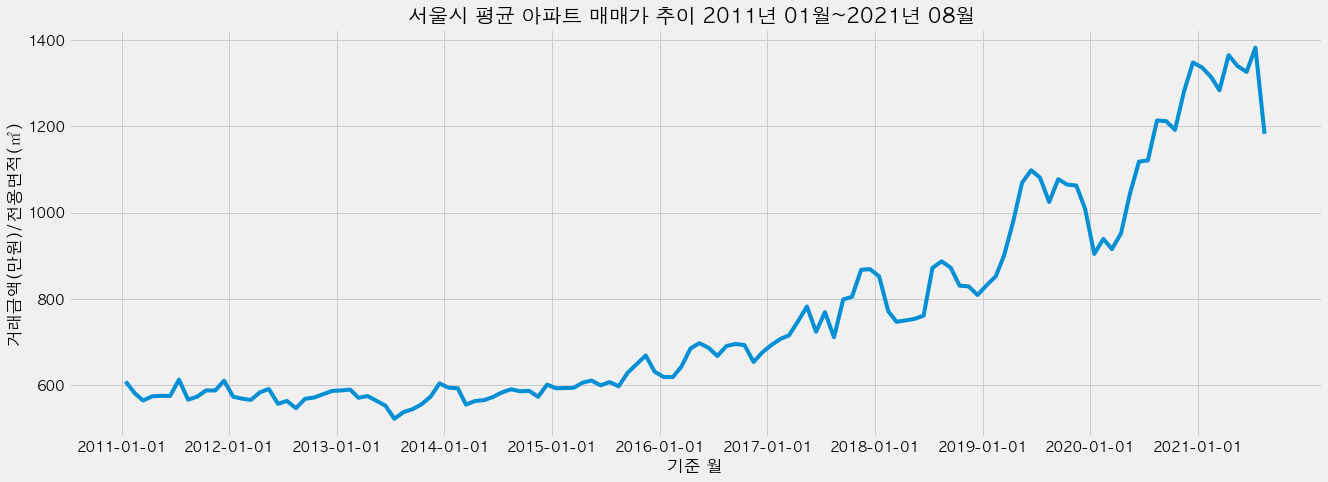

In [769]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,7)) ## 크기 조절
plt.plot(timeSeries_medv["계약날짜"],timeSeries_medv["거래금액(만원)/전용면적(㎡)"]) ## 내용 설정
plt.title('서울시 평균 아파트 매매가 추이 2011년 01월~2021년 08월 ')  ## 타이틀
plt.xlabel('기준 월')  ## x축
plt.ylabel('거래금액(만원)/전용면적(㎡)')  ## y축
plt.xticks(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
## x축 감격 설정
plt.show()

## 서울시 주택 담보 대출 2011년~2021년까지 
    출처 : https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_008Y003
    기간 2011년 01월 ~ 2021년 08월
    (단위 : 십억원)
## read_csv하는데 필요한 파일목록
    ./data/서울시_주택담보대출.csv


In [770]:
mortgage = pd.read_csv('./data/서울시_주택담보대출.csv', encoding='CP949')

In [771]:
mortgage.head(10) 

,계정코드별,지역코드별,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,...,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05
0,예금취급기관,서울,193139.8,193848.4,194886.7,195633.0,196699.9,197868.1,198817.2,199989.5,...,345570.0,350203.9,355160.8,361190.4,363817.0,368505.5,371717.3,375179.8,385299.8,383313.8
1,주택담보대출,서울,124710.3,125280.3,126216.0,126822.7,126687.8,127018.0,127536.8,127651.6,...,205553.4,208142.8,210849.4,212534.2,214865.7,217196.4,220054.2,222423.7,224023.6,225226.0
2,기타대출,서울,68429.5,68568.1,68670.7,68810.3,70012.1,70850.1,71280.4,72337.8,...,140016.7,142061.1,144311.4,148656.1,148951.3,151309.1,151663.2,152756.2,161276.2,158087.8
3,예금은행,서울,169489.2,170077.8,170858.8,171365.5,172186.6,173081.5,173692.4,174583.9,...,298771.6,303023.1,307478.0,312736.3,314963.4,318912.2,321493.4,324146.7,332640.9,330308.3
4,주택담보대출,서울,110023.5,110519.4,111300.8,111772.6,111618.7,111827.7,112259.3,112255.8,...,190483.9,193141.5,195840.5,197539.2,199946.5,202250.9,204918.2,207094.9,208558.5,209714.0
5,기타대출,서울,59465.8,59558.4,59558.0,59592.9,60567.9,61253.8,61433.1,62328.1,...,108287.7,109881.6,111637.5,115197.1,115016.9,116661.3,116575.2,117051.8,124082.4,120594.3
6,비은행예금취급기관,서울,23650.5,23770.6,24028.0,24267.5,24513.2,24786.6,25124.8,25405.6,...,46798.4,47180.8,47682.8,48454.1,48853.5,49593.3,50223.9,51033.1,52658.9,53005.4
7,주택담보대출,서울,14686.8,14760.8,14915.2,15050.1,15069.1,15190.3,15277.5,15395.8,...,15069.5,15001.3,15008.9,14995.1,14919.1,14945.5,15135.9,15328.7,15465.1,15512.0
8,기타대출,서울,8963.7,9009.8,9112.8,9217.4,9444.1,9596.3,9847.3,10009.8,...,31729.0,32179.5,32673.8,33459.0,33934.4,34647.8,35088.0,35704.4,37193.8,37493.5
9,상호저축은행,서울,3973.4,4071.7,4175.8,4320.7,4437.3,4565.4,4767.8,4840.0,...,18892.8,19293.1,19770.7,20318.7,20793.5,21375.2,21759.5,22301.8,23118.4,23672.1


In [772]:
seoul_mortgage=mortgage.iloc[1:2,2:] # 주택 담보대출 데이터는 인덱스1 로우(서울시 주택 담보대출)과, 계정코드와 지역코드는 뺀 2번째 칼럼부터 사용하기로 한다.

In [773]:
seoul_mortgage

,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,2011. 10,...,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05
1,124710.3,125280.3,126216.0,126822.7,126687.8,127018.0,127536.8,127651.6,128044.9,128497.6,...,205553.4,208142.8,210849.4,212534.2,214865.7,217196.4,220054.2,222423.7,224023.6,225226.0


In [774]:
seoul_mortgage1=seoul_mortgage.T.reset_index()

In [775]:
seoul_mortgage1

,index,1
0,2011. 01,124710.3
1,2011. 02,125280.3
2,2011. 03,126216.0
3,2011. 04,126822.7
4,2011. 05,126687.8
...,...,...
120,2021. 01,217196.4
121,2021. 02,220054.2
122,2021. 03,222423.7
123,2021. 04,224023.6


# 주택 담보 대출 금리 
    데이터 출처 : https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_005Y004
    기간 : 2011년 01월~ 2021년 06월

In [776]:
interest_rate=pd.read_csv("./data/주택담보대출이자율.csv",encoding='CP949')

In [777]:
interest_rate.head(20)

,계정항목코드별,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
0,종금사할인어음,3.91,4.35,4.90,3.98,4.15,4.46,4.23,4.22,4.18,...,1.24,1.22,1.17,1.31,1.11,1.20,1.35,1.21,1.07,1.46
1,계약금액내대출,12.30,11.42,11.51,10.78,11.55,11.39,13.93,11.94,13.22,...,-,0.00,-,-,-,-,-,-,-,-
2,할인어음,9.89,10.27,9.97,9.62,10.25,9.90,9.64,9.49,9.88,...,6.50,6.07,5.19,6.59,7.07,7.39,6.48,6.57,7.21,7.28
3,일반대출,15.00,15.22,15.41,15.41,16.72,15.07,17.50,16.71,16.71,...,9.73,10.18,10.05,9.94,10.14,10.11,9.70,9.96,10.21,9.71
4,기업자금대출1),10.22,10.31,10.51,10.12,10.42,10.04,10.43,10.44,10.57,...,5.99,6.02,5.93,6.14,6.07,6.08,6.03,6.05,6.27,6.40
5,가계자금대출 1),21.22,21.16,23.42,23.22,23.71,23.68,23.22,22.95,23.25,...,14.41,14.22,14.05,13.98,14.25,14.40,14.04,14.00,13.76,13.48
6,주택담보대출,-,-,-,-,-,-,-,-,-,...,5.41,4.84,5.24,5.21,4.90,5.08,4.84,5.34,4.92,4.91
7,기타담보대출,-,-,-,-,-,-,-,-,-,...,7.46,6.90,6.92,7.14,7.20,7.92,7.76,8.02,8.03,7.50
8,보증대출,-,-,-,-,-,-,-,-,-,...,8.76,8.60,8.66,8.62,8.78,8.76,8.55,8.35,8.17,8.08
9,일반신용대출,-,-,-,-,-,-,-,-,-,...,16.83,16.94,16.51,16.72,16.52,16.49,16.12,15.67,15.39,15.33


In [778]:
interest_rate.iloc[6:7,:]

,계정항목코드별,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
6,주택담보대출,-,-,-,-,-,-,-,-,-,...,5.41,4.84,5.24,5.21,4.90,5.08,4.84,5.34,4.92,4.91


In [779]:
mortgage_rate=interest_rate.iloc[6:7,1:] # 주택 담보 대출 이자율은 인덱스 6(로우)와 계정코드는 뺀 첫번째 칼럼부터 사용한다.

In [780]:
mortgage_rate

,2011. 01,2011. 02,2011. 03,2011. 04,2011. 05,2011. 06,2011. 07,2011. 08,2011. 09,2011. 10,...,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06
6,-,-,-,-,-,-,-,-,-,-,...,5.41,4.84,5.24,5.21,4.90,5.08,4.84,5.34,4.92,4.91


In [781]:
mortgage_rate1=mortgage_rate.T.reset_index() # 향후 데이터 프레임으로 합치기 위해서 전치시켜주었고, 인덱스를 재설정해주었다.

In [782]:
mortgage_rate1

,index,6
0,2011. 01,-
1,2011. 02,-
2,2011. 03,-
3,2011. 04,-
4,2011. 05,-
...,...,...
121,2021. 02,5.08
122,2021. 03,4.84
123,2021. 04,5.34
124,2021. 05,4.92


In [783]:
kospi=pd.read_excel("./data/종합주가지수.xlsx")

In [784]:
kospi

,* 통계표명 :,종합주가지수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 476,Unnamed: 477,Unnamed: 478,Unnamed: 479,Unnamed: 480,Unnamed: 481,Unnamed: 482,Unnamed: 483,Unnamed: 484,Unnamed: 485
0,* 수록기간 :,1981년 01월 ~ 2021년 05월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* 조회기간 :,1981년 01월 ~ 2021년 05월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* 출처 :,한국은행,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,* 자료다운일자 :,2021.08.13 13:26:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* 단위 :,지수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,지 역,1981년 01월,1981년 02월,1981년 03월,1981년 04월,1981년 05월,1981년 06월,1981년 07월,1981년 08월,1981년 09월,...,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월,2021년 01월,2021년 02월,2021년 03월,2021년 04월,2021년 05월


In [785]:
kospi1=kospi.iloc[9:11,-125:].T.reset_index() # 코스피 지수는 인덱스 9(날짜) 인덱스 10(주가지수)를 쓰고, 뒤에 125개의 칼럼만 쓰기로 한다.

In [786]:
kospi1

,index,9,10
0,Unnamed: 361,2011년 01월,2091.61
1,Unnamed: 362,2011년 02월,2002.87
2,Unnamed: 363,2011년 03월,2002.67
3,Unnamed: 364,2011년 04월,2153.13
4,Unnamed: 365,2011년 05월,2121.87
...,...,...,...
120,Unnamed: 481,2021년 01월,3089.27
121,Unnamed: 482,2021년 02월,3092.41
122,Unnamed: 483,2021년 03월,3032.47
123,Unnamed: 484,2021년 04월,3165.08


In [787]:
kospi2=kospi1.iloc[:,1:] # 필요없는 첫번째 인덱스는 빼고 kospi2에 재설정해준다.

In [788]:
kospi2

,9,10
0,2011년 01월,2091.61
1,2011년 02월,2002.87
2,2011년 03월,2002.67
3,2011년 04월,2153.13
4,2011년 05월,2121.87
...,...,...
120,2021년 01월,3089.27
121,2021년 02월,3092.41
122,2021년 03월,3032.47
123,2021년 04월,3165.08


## 월별 원/달러 환율
    데이터 출처 : https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1068
    기간 : 2011년 01월 ~ 2021년 07월 
## read_csv 필요한 파일
    - ./data/exchange_rate.xls

In [789]:
exchange_rate=pd.read_excel("./data/exchange_rate.xls")

In [790]:
exchange_rate

,통계표명:,환율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128
0,단위:,원/달러,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2011\r\n01월,2011\r\n02월,2011\r\n03월,2011\r\n04월,2011\r\n05월,2011\r\n06월,2011\r\n07월,2011\r\n08월,...,2020\r\n10월,2020\r\n11월,2020\r\n12월,2021\r\n01월,2021\r\n02월,2021\r\n03월,2021\r\n04월,2021\r\n05월,2021\r\n06월,2021\r\n07월
2,원/달러,환율,"1,121.5","1,128.7","1,096.7","1,071.5","1,079.2","1,067.7","1,054.5","1,066.8",...,"1,135.1","1,106.5","1,086.3","1,118.8","1,123.5","1,131.8","1,112.3","1,110.9","1,126.1","1,150.3"
3,NaN,절상율(%),1.2,0.5,3.5,5.9,5.2,6.3,7.6,6.4,...,1.9,4.5,6.5,-2.9,-3.3,-4.0,-2.3,-2.2,-3.5,-5.6
4,엔/달러,환율,82.0,81.7,82.7,81.5,81.4,80.4,77.5,76.6,...,104.3,103.9,103.3,104.5,106.2,110.7,108.8,109.7,110.5,109.6
5,NaN,절상율(%),-0.7,-0.3,-1.6,-0.1,0.1,1.3,5.0,6.4,...,4.7,5.0,5.6,-1.1,-2.6,-6.7,-5.0,-5.8,-6.5,-5.7
6,원/100엔,환율,"1,367.9","1,382.2","1,325.6","1,314.1","1,326.1","1,328.2","1,360.3","1,393.4",...,"1,088.8","1,065.2","1,051.2","1,070.7","1,058.4","1,022.2","1,022.4","1,012.3","1,019.3","1,049.5"
7,NaN,절상율(%),1.9,0.8,5.1,6.1,5.1,4.9,2.4,0.0,...,-2.7,-0.5,0.8,-1.8,-0.7,2.8,2.8,3.8,3.1,0.2
8,출처:,기획재정부 (통화별 환율 조사통계),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,주석:,"* 환율은 서울외환시장 종가(15:00현재, '05.2월 이전은 16:00현재, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [791]:
exchange_rate1=exchange_rate.iloc[1:3,2:].T.reset_index() # 필요한 칼럼과 인덱스만 선택한 뒤 전치, 인덱스를 재설정해준다. 

In [792]:
exchange_rate2=exchange_rate1.iloc[:,1:]

In [793]:
exchange_rate2

,1,2
0,2011\r\n01월,"1,121.5"
1,2011\r\n02월,"1,128.7"
2,2011\r\n03월,"1,096.7"
3,2011\r\n04월,"1,071.5"
4,2011\r\n05월,"1,079.2"
...,...,...
122,2021\r\n03월,"1,131.8"
123,2021\r\n04월,"1,112.3"
124,2021\r\n05월,"1,110.9"
125,2021\r\n06월,"1,126.1"


In [794]:
TimeSeries=pd.concat([timeSeries_medv,seoul_mortgage1,mortgage_rate1,kospi2,exchange_rate2],axis=1)
# 전체 적인 데이터 프름을 보기위해 면적당 아파트가격
# 주택담보대출액
# 주택 담보대출 이자율
# 코스피지수 
# 환율 지수 등을 
# 하나의 파일로합쳐주었다.

In [795]:
TimeSeries.head(50)
TimeSeries.tail(50)

,계약날짜,거래금액(만원)/전용면적(㎡),index,1,index,6,9,10,1,2
78,2017-07-15,769.445083,2017. 07,172570.4,2017. 07,5.72,2017년 07월,2412.9,2017\r\n07월,"1,119.0"
79,2017-08-15,711.428585,2017. 08,174607.2,2017. 08,6.08,2017년 08월,2372.18,2017\r\n08월,"1,127.8"
80,2017-09-15,798.817388,2017. 09,174828.7,2017. 09,6.15,2017년 09월,2371.84,2017\r\n09월,"1,145.4"
81,2017-10-15,805.141879,2017. 10,175427.9,2017. 10,6.06,2017년 10월,2482.87,2017\r\n10월,"1,120.4"
82,2017-11-15,867.701066,2017. 11,176351.5,2017. 11,5.87,2017년 11월,2533.51,2017\r\n11월,"1,088.2"
83,2017-12-15,869.073206,2017. 12,176991.0,2017. 12,6.23,2017년 12월,2467.73,2017\r\n12월,"1,070.5"
84,2018-01-15,852.312235,2018. 01,177280.4,2018. 01,6.17,2018년 01월,2520.94,2018\r\n01월,"1,067.9"
85,2018-02-15,771.679820,2018. 02,177150.8,2018. 02,6.33,2018년 02월,2439.1,2018\r\n02월,"1,082.8"
86,2018-03-15,747.100187,2018. 03,177624.2,2018. 03,6.23,2018년 03월,2451.57,2018\r\n03월,"1,063.5"
87,2018-04-15,750.340782,2018. 04,178078.0,2018. 04,6.23,2018년 04월,2458.22,2018\r\n04월,"1,068.0"


In [796]:
TimeSeries.columns=["계약날짜","제곱미터당아파트가격","계약날짜1","서울시주택담보대출(단위:십억원)","계약날짜2","주택이자율","계약날짜3","코스피지수","계약날짜4","환율(원/달러)"]

In [797]:
TimeSeries["환율(원/달러)"]=TimeSeries["환율(원/달러)"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
# 문자형이었던 환율 칼럼을 수치형 변수로 변환해주었다.

In [798]:
TimeSeries["환율(원/달러)"]=TimeSeries["환율(원/달러)"].astype("float")

In [799]:
# 주택 담보 이자율의 경우 2014-05-15 부터 데이터가 있기 때문에, 이 기간에 맞추어 전체 데이터를 추출해주었다.
TimeSeries1=TimeSeries[["계약날짜","제곱미터당아파트가격","서울시주택담보대출(단위:십억원)","주택이자율","코스피지수","환율(원/달러)"]].iloc[40:-3,:]

In [800]:
TimeSeries1=TimeSeries1.reset_index()

In [801]:
TimeSeries1

,index,계약날짜,제곱미터당아파트가격,서울시주택담보대출(단위:십억원),주택이자율,코스피지수,환율(원/달러)
0,40,2014-05-15,565.599244,128903.2,7.63,1994.13,10201.0
1,41,2014-06-15,573.127082,129784.1,7.61,1995.08,10118.0
2,42,2014-07-15,583.644532,130921.4,7.56,2021.95,10279.0
3,43,2014-08-15,590.800611,131869.6,7.60,2060.93,10140.0
4,44,2014-09-15,586.267858,133147.8,7.43,2042.71,10552.0
...,...,...,...,...,...,...,...
80,120,2021-01-15,1336.175163,217196.4,4.90,3089.27,11188.0
81,121,2021-02-15,1313.692868,220054.2,5.08,3092.41,11235.0
82,122,2021-03-15,1283.313250,222423.7,4.84,3032.47,11318.0
83,123,2021-04-15,1364.642214,224023.6,5.34,3165.08,11123.0


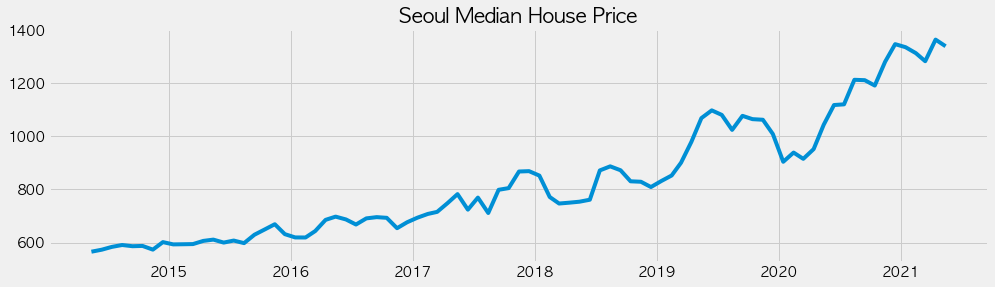

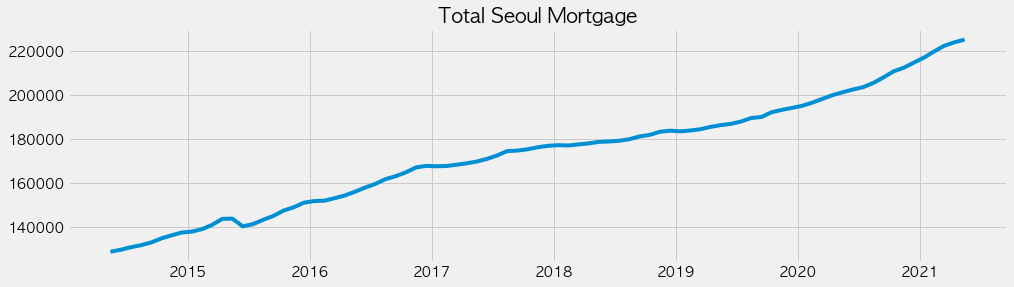

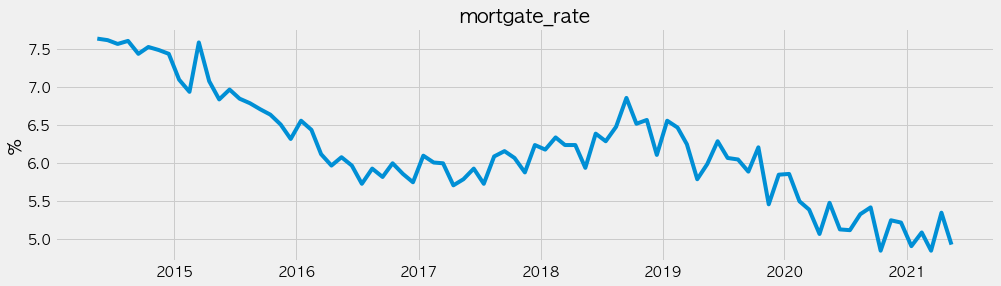

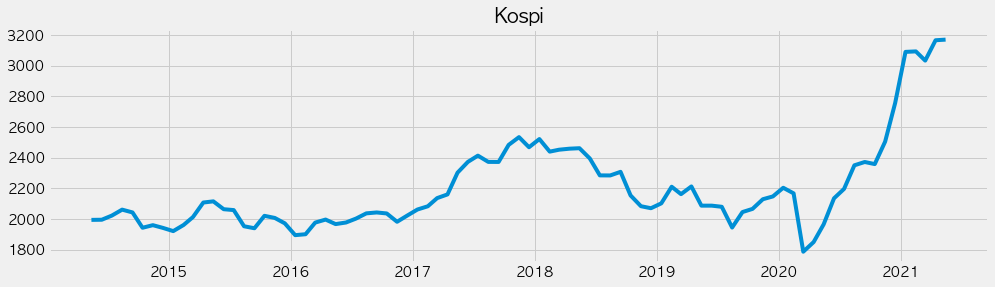

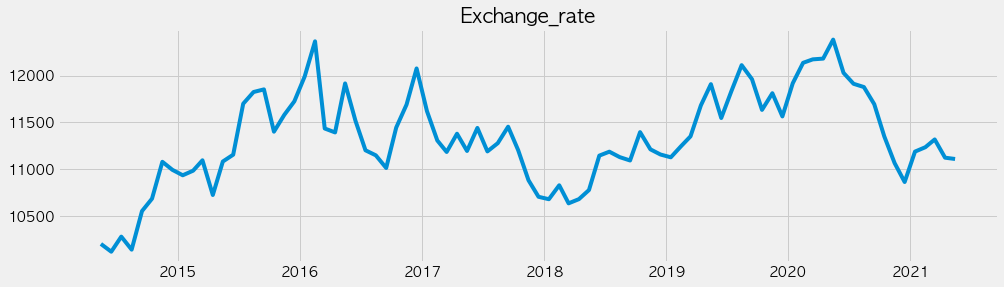

In [802]:
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["제곱미터당아파트가격"]) ## 내용 설정
plt.title('Seoul Median House Price')  ## 타이틀
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["서울시주택담보대출(단위:십억원)"].astype("float"))
plt.title('Total Seoul Mortgage')  ## 타이틀
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["주택이자율"].astype("float"))
plt.title('mortgate_rate')  ## 타이틀
plt.ylabel('%')  ## y축
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["코스피지수"])
plt.title('Kospi')  ## 타이틀
plt.show()
plt.figure(figsize=(15,4)) ## 크기 조절
plt.plot(TimeSeries1["계약날짜"],TimeSeries1["환율(원/달러)"].astype("float"))
plt.title('Exchange_rate')  ## 타이틀
plt.show()

In [803]:
TimeSeries1["제곱미터당아파트가격"]=TimeSeries1["제곱미터당아파트가격"].astype('float')
TimeSeries1["서울시주택담보대출(단위:십억원)"]=TimeSeries1["서울시주택담보대출(단위:십억원)"].astype('float')
TimeSeries1["주택이자율"]=TimeSeries1["주택이자율"].astype('float')
TimeSeries1["코스피지수"]=TimeSeries1["코스피지수"].astype('float')
TimeSeries1["환율(원/달러)"]=TimeSeries1["환율(원/달러)"].astype('float')

In [804]:
TimeSeries1["코스피지수"].describe()

count      85.000000
mean     2200.544000
std       297.845761
min      1786.750000
25%      2002.480000
50%      2086.900000
75%      2357.820000
max      3169.200000
Name: 코스피지수, dtype: float64

In [805]:
TimeSeries1["코스피지수"].min()

1786.75

In [806]:
TimeSeries1["서울시주택담보대출(단위:십억원)"].describe()

count        85.000000
mean     173378.477647
std       25293.034379
min      128903.200000
25%      152080.100000
50%      176351.500000
75%      189603.000000
max      225226.000000
Name: 서울시주택담보대출(단위:십억원), dtype: float64

In [807]:
TimeSeries2=TimeSeries1.copy()

In [808]:
# Min-Max Scaling : 5가지 변수의 단위가 다 달라서 그래프를 한 화면에 겹쳐 그렸을 때 오류가 생겼다.
# 각 칼럼의 최대는 1 최소는 0으로 변환 시켜주는 Min-Max Scaling을 해주어서, 한 화면에 그려졌을 때 시각화가 더 잘되었다.

TimeSeries2["제곱미터당아파트가격"]=(TimeSeries1["제곱미터당아파트가격"]-TimeSeries1["제곱미터당아파트가격"].min())/(TimeSeries1["제곱미터당아파트가격"].max()-TimeSeries1["제곱미터당아파트가격"].min())
TimeSeries2["서울시주택담보대출(단위:십억원)"]=(TimeSeries1["서울시주택담보대출(단위:십억원)"]-TimeSeries1["서울시주택담보대출(단위:십억원)"].min())/(TimeSeries1["서울시주택담보대출(단위:십억원)"].max()-TimeSeries1["서울시주택담보대출(단위:십억원)"].min())
TimeSeries2["주택이자율"]=(TimeSeries1["주택이자율"]-TimeSeries1["주택이자율"].min())/(TimeSeries1["주택이자율"].max()-TimeSeries1["주택이자율"].min())
TimeSeries2["코스피지수"]=(TimeSeries1["코스피지수"]-TimeSeries1["코스피지수"].min())/(TimeSeries1["코스피지수"].max()-TimeSeries1["코스피지수"].min())
TimeSeries2["환율(원/달러)"]=(TimeSeries1["환율(원/달러)"]-TimeSeries1["환율(원/달러)"].min())/(TimeSeries1["환율(원/달러)"].max()-TimeSeries1["환율(원/달러)"].min())


In [834]:
TimeSeries2

,index,계약날짜,제곱미터당아파트가격,서울시주택담보대출(단위:십억원),주택이자율,코스피지수,환율(원/달러)
0,40,2014-05-15,0.000000,0.000000,1.000000,0.150009,0.036612
1,41,2014-06-15,0.009421,0.009145,0.992832,0.150696,0.000000
2,42,2014-07-15,0.022584,0.020952,0.974910,0.170133,0.071019
3,43,2014-08-15,0.031539,0.030796,0.989247,0.198329,0.009704
4,44,2014-09-15,0.025867,0.044066,0.928315,0.185150,0.191442
...,...,...,...,...,...,...,...
80,120,2021-01-15,0.964374,0.916639,0.021505,0.942182,0.471989
81,121,2021-02-15,0.936237,0.946308,0.086022,0.944454,0.492722
82,122,2021-03-15,0.898217,0.970907,0.000000,0.901096,0.529334
83,123,2021-04-15,1.000000,0.987517,0.179211,0.997020,0.443317


In [810]:
TimeSeries2["계약날짜"].tail(50)

35   2017-04-15
36   2017-05-15
37   2017-06-15
38   2017-07-15
39   2017-08-15
40   2017-09-15
41   2017-10-15
42   2017-11-15
43   2017-12-15
44   2018-01-15
45   2018-02-15
46   2018-03-15
47   2018-04-15
48   2018-05-15
49   2018-06-15
50   2018-07-15
51   2018-08-15
52   2018-09-15
53   2018-10-15
54   2018-11-15
55   2018-12-15
56   2019-01-15
57   2019-02-15
58   2019-03-15
59   2019-04-15
60   2019-05-15
61   2019-06-15
62   2019-07-15
63   2019-08-15
64   2019-09-15
65   2019-10-15
66   2019-11-15
67   2019-12-15
68   2020-01-15
69   2020-02-15
70   2020-03-15
71   2020-04-15
72   2020-05-15
73   2020-06-15
74   2020-07-15
75   2020-08-15
76   2020-09-15
77   2020-10-15
78   2020-11-15
79   2020-12-15
80   2021-01-15
81   2021-02-15
82   2021-03-15
83   2021-04-15
84   2021-05-15
Name: 계약날짜, dtype: datetime64[ns]

Text(10, 4, '부르는게 값이던 강남아파트, 2-3억 내려도 안팔려요')

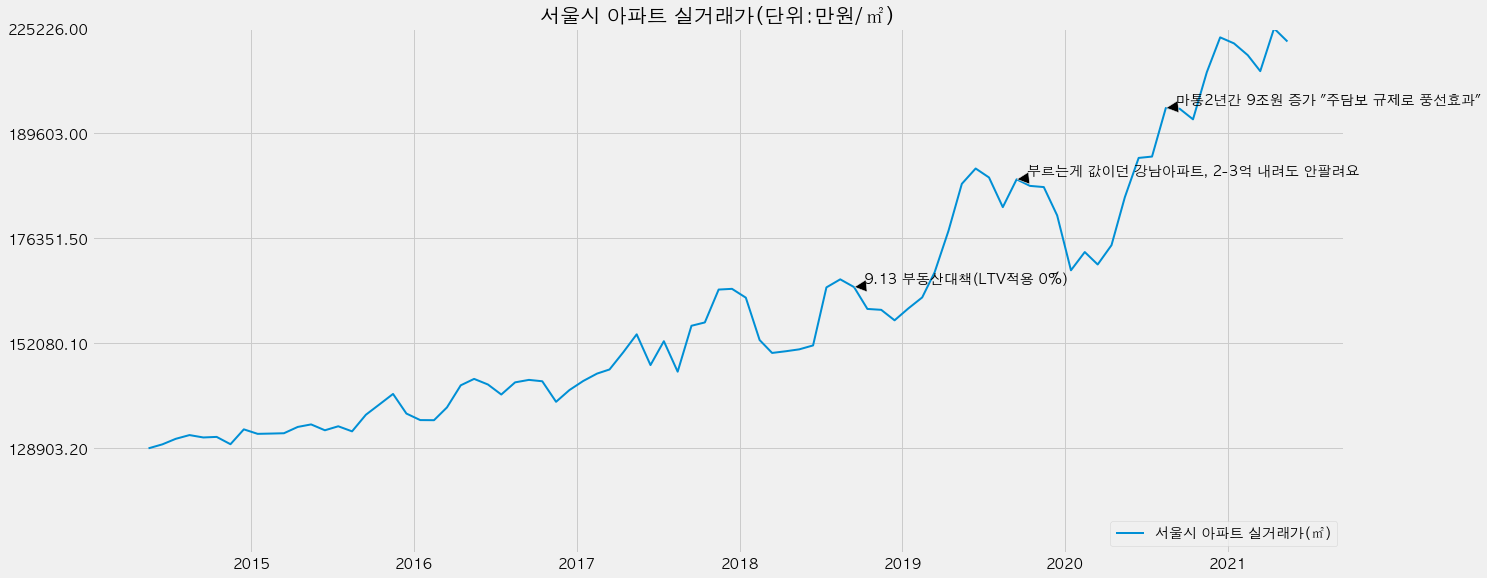

In [811]:

plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2 ,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.title('서울시 아파트 실거래가(단위:만원/㎡)')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['128903.20','152080.10','176351.50','189603.00','225226.00']) # y축 라벨을 아파트값으로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.annotate('9.13 부동산대책(LTV적용 0%)', xy=(TimeSeries2["계약날짜"][52],TimeSeries2["제곱미터당아파트가격"][52]), xytext=(10,4),textcoords='offset points', arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('마통2년간 9조원 증가 "주담보 규제로 풍선효과"', xy=(TimeSeries2["계약날짜"][75],TimeSeries2["제곱미터당아파트가격"][75]), xytext=(10,4),textcoords='offset points', arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('부르는게 값이던 강남아파트, 2-3억 내려도 안팔려요', xy=(TimeSeries2["계약날짜"][64],TimeSeries2["제곱미터당아파트가격"][64]), xytext=(10,4),textcoords='offset points', arrowprops=dict(facecolor='black',shrink=0.05))


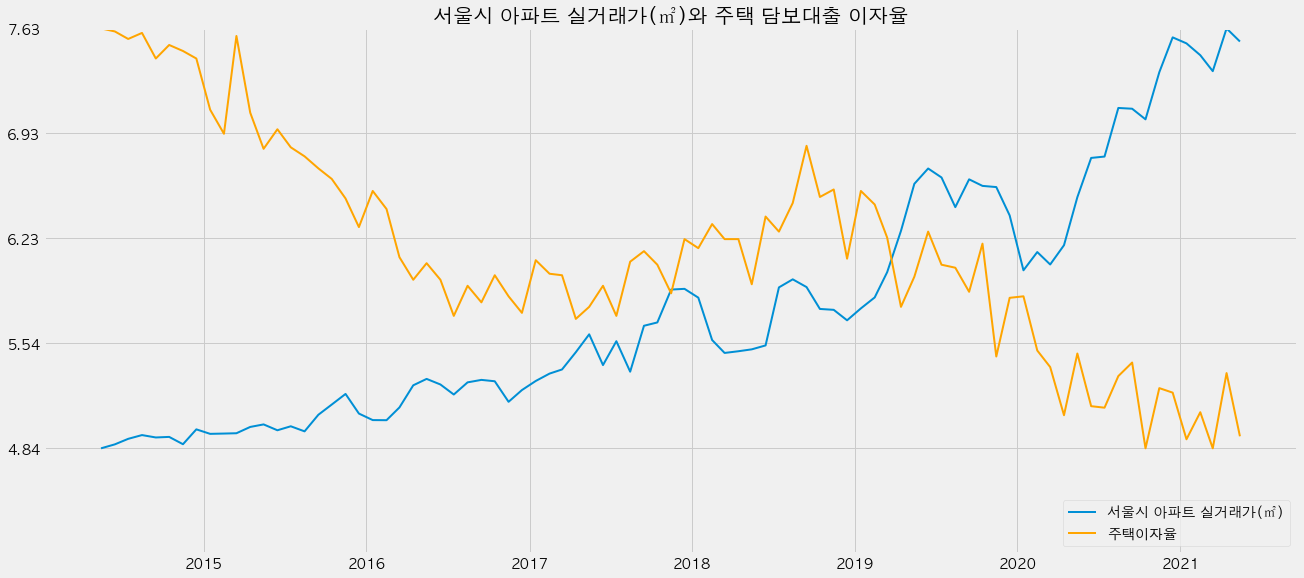

In [812]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2 ,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["주택이자율"],color='orange',linewidth=2, markersize=12,label="주택이자율")
plt.title('서울시 아파트 실거래가(㎡)와 주택 담보대출 이자율')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['4.84', '5.54', '6.23', '6.93', '7.63']) # y축 라벨을 코스피 지수로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()

In [813]:
np.linspace(TimeSeries1["서울시주택담보대출(단위:십억원)"].min(),TimeSeries1["서울시주택담보대출(단위:십억원)"].max(),5).astype('str')

array(['128903.2', '152983.9', '177064.6', '201145.3', '225226.0'],
      dtype='<U32')

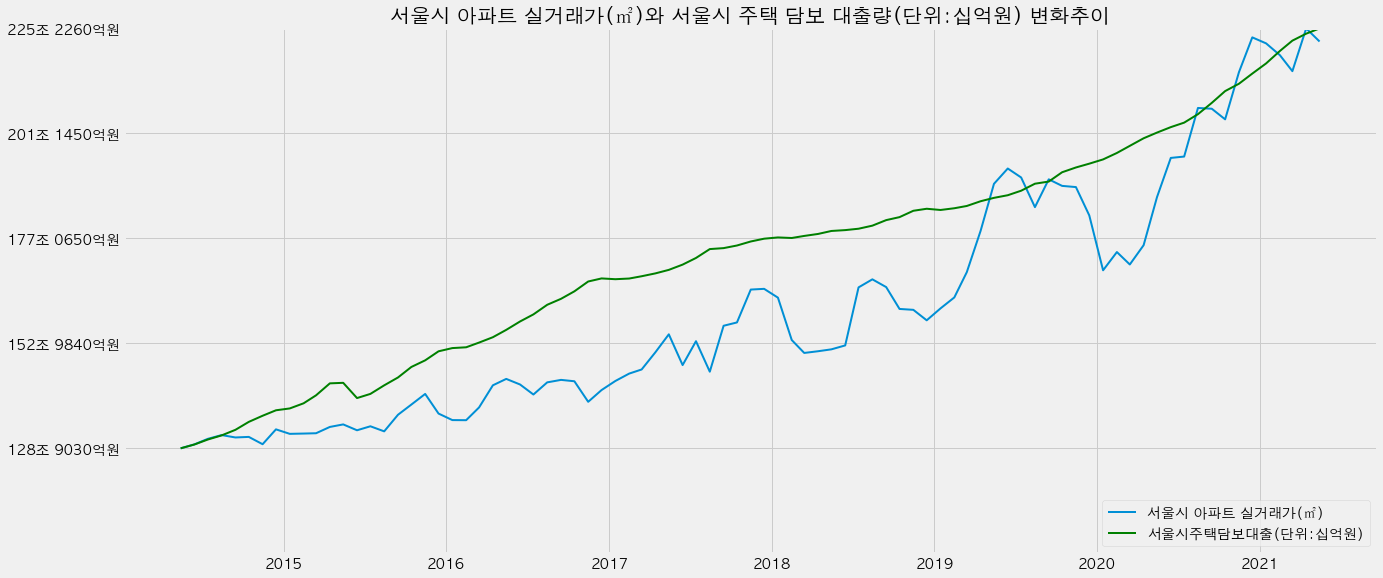

In [814]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2 ,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["서울시주택담보대출(단위:십억원)"],color='green',linewidth=2, markersize=12,label="서울시주택담보대출(단위:십억원)")
plt.title('서울시 아파트 실거래가(㎡)와 서울시 주택 담보 대출량(단위:십억원) 변화추이')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['128조 9030억원', '152조 9840억원', '177조 0650억원', '201조 1450억원', '225조 2260억원']) # y축 라벨을 코스피 지수로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()

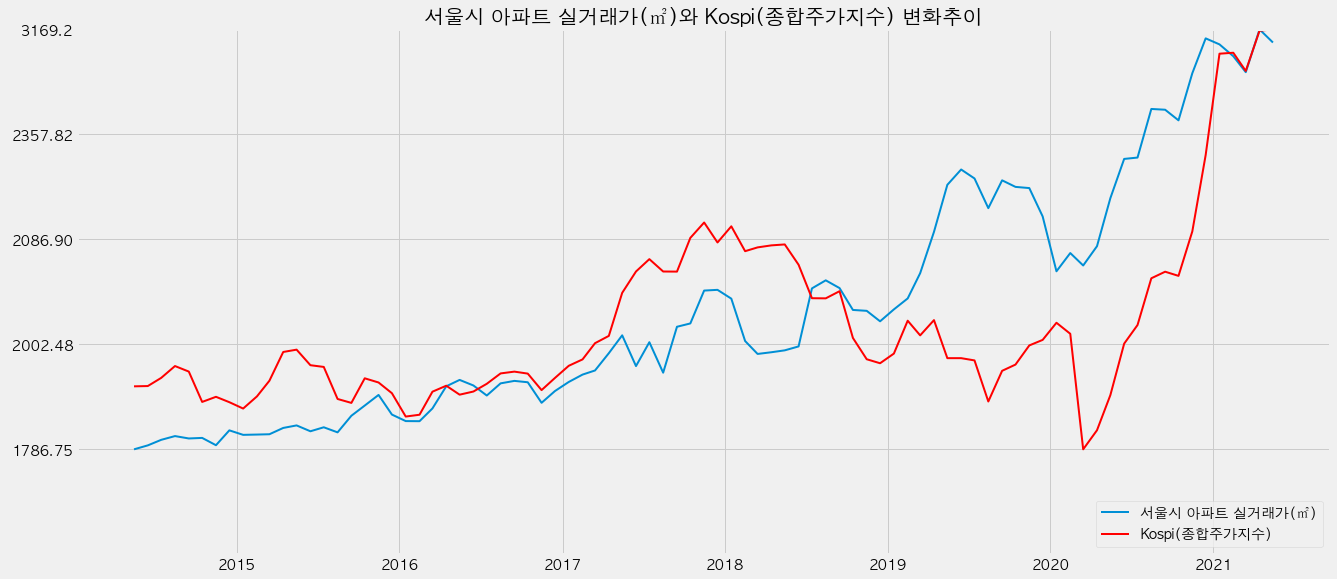

In [815]:
plt.style.use('fivethirtyeight') # 그래프 스타일
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=2,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["코스피지수"],color='red',linewidth=2, markersize=12,label="Kospi(종합주가지수)")
plt.title('서울시 아파트 실거래가(㎡)와 Kospi(종합주가지수) 변화추이')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['1786.75',' 2002.48','2086.90','2357.82','3169.2']) # y축 라벨을 코스피 지수로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()

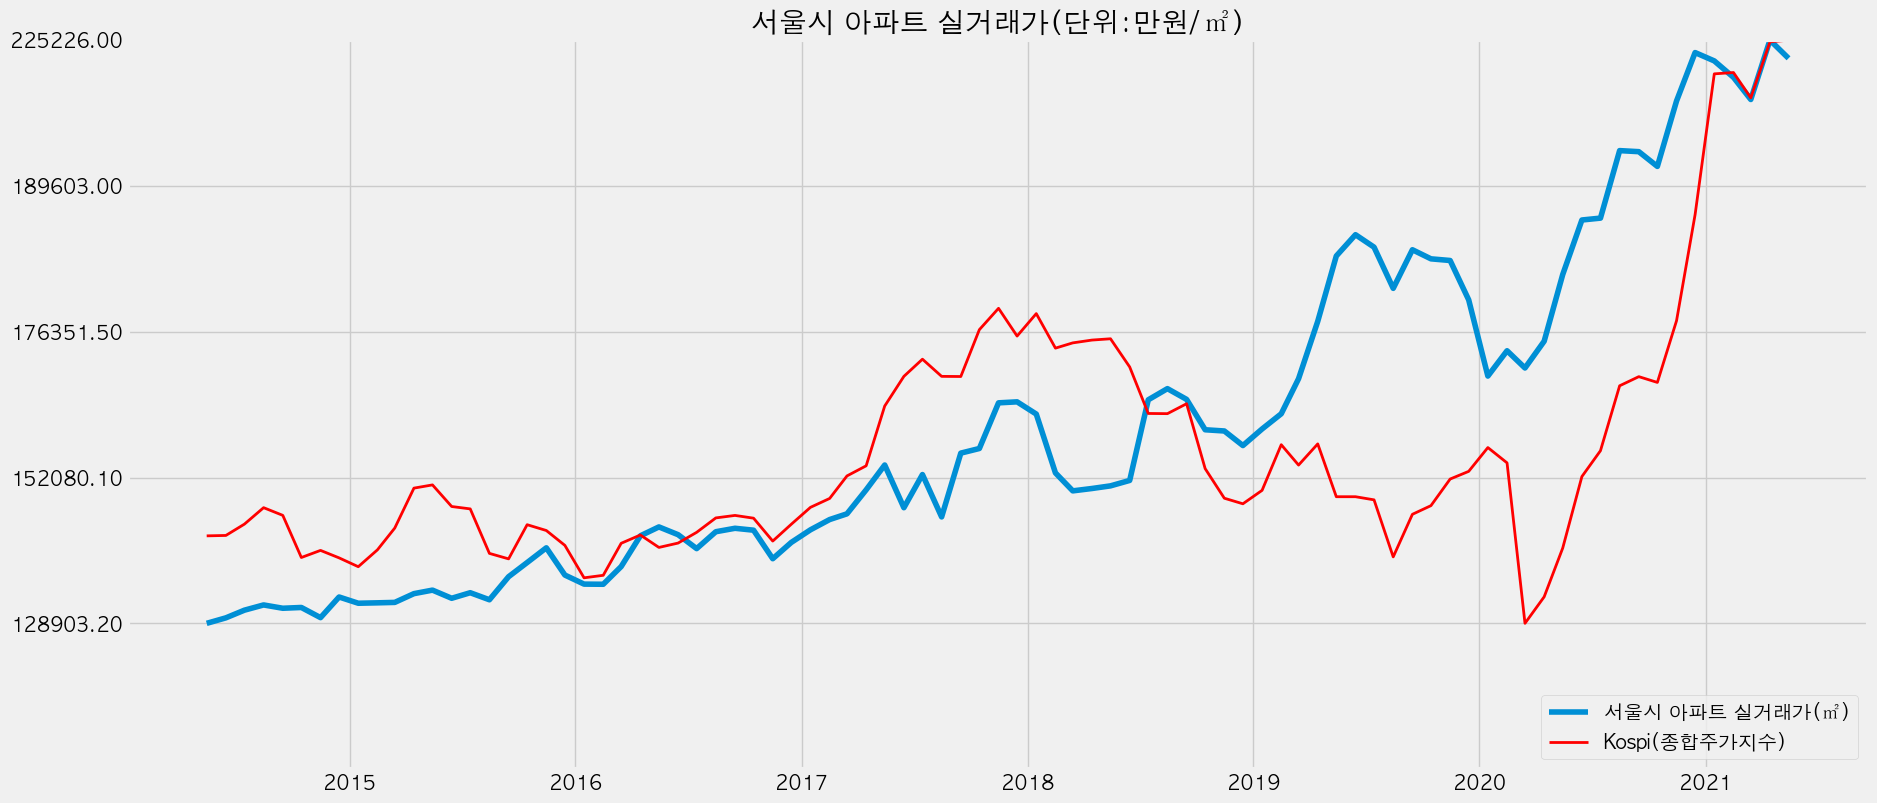

In [816]:
plt.style.use('default') # 그래프 스타일
plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = u'AppleGothic' # 플롯을 그릴 때 한글을 인식하게 해주는 코드 
plt.figure(figsize=(20,9)) ## 크기 조절
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["제곱미터당아파트가격"],linewidth=4,label='서울시 아파트 실거래가(㎡)') ## 내용 설정
plt.plot(TimeSeries2["계약날짜"],TimeSeries2["코스피지수"],color='red',linewidth=2, markersize=12,label="Kospi(종합주가지수)")
plt.title('서울시 아파트 실거래가(단위:만원/㎡)')
plt.ylim([-0.25, 1])     # Y축의 범위: [ymin, ymax]
plt.yticks([0,0.25,0.5,0.75,1],['128903.20','152080.10','176351.50','189603.00','225226.00']) # y축 라벨을 아파트값으로 라벨링
plt.legend(loc='lower right') # 범례를 오른쪽 밑에 표시해준다. 
plt.show()

In [817]:
import scipy
from scipy import stats
scipy.stats.spearmanr(TimeSeries2["제곱미터당아파트가격"], TimeSeries2["코스피지수"]).correlation

0.614493914869142

In [818]:
yearly_apart = [TimeSeries2["제곱미터당아파트가격"][0:8].mean(),# 인덱스 0~7까지 2014년에 해당
            TimeSeries2["제곱미터당아파트가격"][8:20].mean(), # 인덱스 8~19까지 2015년에 해당 
            TimeSeries2["제곱미터당아파트가격"][20:32].mean(), # 인덱스 20~31까지 2016년에 해당 
            TimeSeries2["제곱미터당아파트가격"][32:44].mean(), # 인덱스 32~43 까지 2017년에 해당
            TimeSeries2["제곱미터당아파트가격"][44:56].mean(), # 인덱스 44~55까지 2018년에 해당
            TimeSeries2["제곱미터당아파트가격"][56:68].mean(), # 인덱스 56~67까지 2019년에 해당
            TimeSeries2["제곱미터당아파트가격"][68:80].mean(), # 인덱스 68~79까지 2020년에 해당
            TimeSeries2["제곱미터당아파트가격"][80:85].mean(), # 인덱스 80~84까지 2020년에 해당
            ]	# y축 지점의 값들

yearly_Kospi = [TimeSeries2["코스피지수"][0:8].mean(),# 인덱스 0~7까지 2014년에 해당
            TimeSeries2["코스피지수"][8:20].mean(), # 인덱스 8~19까지 2015년에 해당 
            TimeSeries2["코스피지수"][20:32].mean(), # 인덱스 20~31까지 2016년에 해당 
            TimeSeries2["코스피지수"][32:44].mean(), # 인덱스 32~43 까지 2017년에 해당
            TimeSeries2["코스피지수"][44:56].mean(), # 인덱스 44~55까지 2018년에 해당
            TimeSeries2["코스피지수"][56:68].mean(), # 인덱스 56~67까지 2019년에 해당
            TimeSeries2["코스피지수"][68:80].mean(), # 인덱스 68~79까지 2020년에 해당
            TimeSeries2["코스피지수"][80:85].mean(), # 인덱스 80~84까지 2020년에 해당
            ]	# y축 지점의 값들

In [819]:
import scipy
from scipy import stats
scipy.stats.spearmanr(yearly_apart, yearly_Kospi).correlation

0.7380952380952381

In [820]:
TimeSeries1=TimeSeries1[["계약날짜","제곱미터당아파트가격","코스피지수"]]

In [821]:
TimeSeries1["계약년도"]=TimeSeries1["계약날짜"].astype("str").str[:4]

/var/folders/zz/lwjzp_r130b4y7w9qcwwkfhr0000gn/T/ipykernel_8752/2608476288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TimeSeries1["계약년도"]=TimeSeries1["계약날짜"].astype("str").str[:4]


In [822]:
TimeSeries1[TimeSeries1["계약년도"]=='2014']["제곱미터당아파트가격"].mean()

582.7348268117787

In [823]:
yearly_apart=[]
yearly_kospi=[]
years=[]
for i in range(2014,2022):
    yearly_apart.append(TimeSeries1[TimeSeries1["계약년도"]==str(i)]["제곱미터당아파트가격"].mean())
    yearly_kospi.append(TimeSeries1[TimeSeries1["계약년도"]==str(i)]["코스피지수"].mean())
    years.append(str(i))

In [824]:
yearly_apart

[582.7348268117787,
 615.2598647891411,
 669.2433517863193,
 766.1558298235167,
 811.4501386265433,
 1004.2814106179268,
 1103.2652322265321,
 1327.5108839820425]

In [825]:
yearly_kospi

[1994.8975,
 2010.7924999999996,
 1986.0658333333333,
 2313.0000000000005,
 2325.6633333333334,
 2105.8741666666665,
 2220.1566666666663,
 3109.686]

In [826]:
yearly=pd.DataFrame([years,yearly_apart,yearly_kospi])

In [827]:
yearly=yearly.T

In [828]:
yearly.columns=["년도","제곱미터당아파트가격(만원)","코스피지수"]

In [829]:
yearly

,년도,제곱미터당아파트가격(만원),코스피지수
0,2014,582.734827,1994.8975
1,2015,615.259865,2010.7925
2,2016,669.243352,1986.065833
3,2017,766.15583,2313.0
4,2018,811.450139,2325.663333
5,2019,1004.281411,2105.874167
6,2020,1103.265232,2220.156667
7,2021,1327.510884,3109.686


In [830]:
import scipy
from scipy import stats
yearly_cor=scipy.stats.spearmanr(yearly["제곱미터당아파트가격(만원)"], yearly["코스피지수"]).correlation
monthly_cor=scipy.stats.spearmanr(TimeSeries1["제곱미터당아파트가격"], TimeSeries1["코스피지수"]).correlation

<AxesSubplot:xlabel='경제지표'>

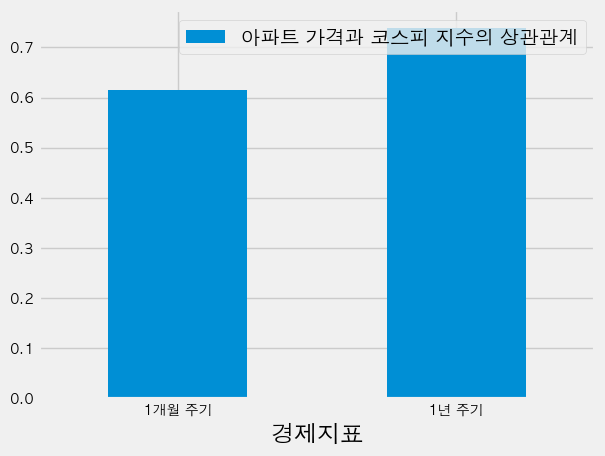

In [831]:
df3 = pd.DataFrame({'경제지표':['1개월 주기', '1년 주기'],
                   '아파트 가격과 코스피 지수의 상관관계':[monthly_cor,yearly_cor]})
df3
df3.plot.bar(x="경제지표", y="아파트 가격과 코스피 지수의 상관관계", rot=0, fontsize=10)